In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

<AxesSubplot: >

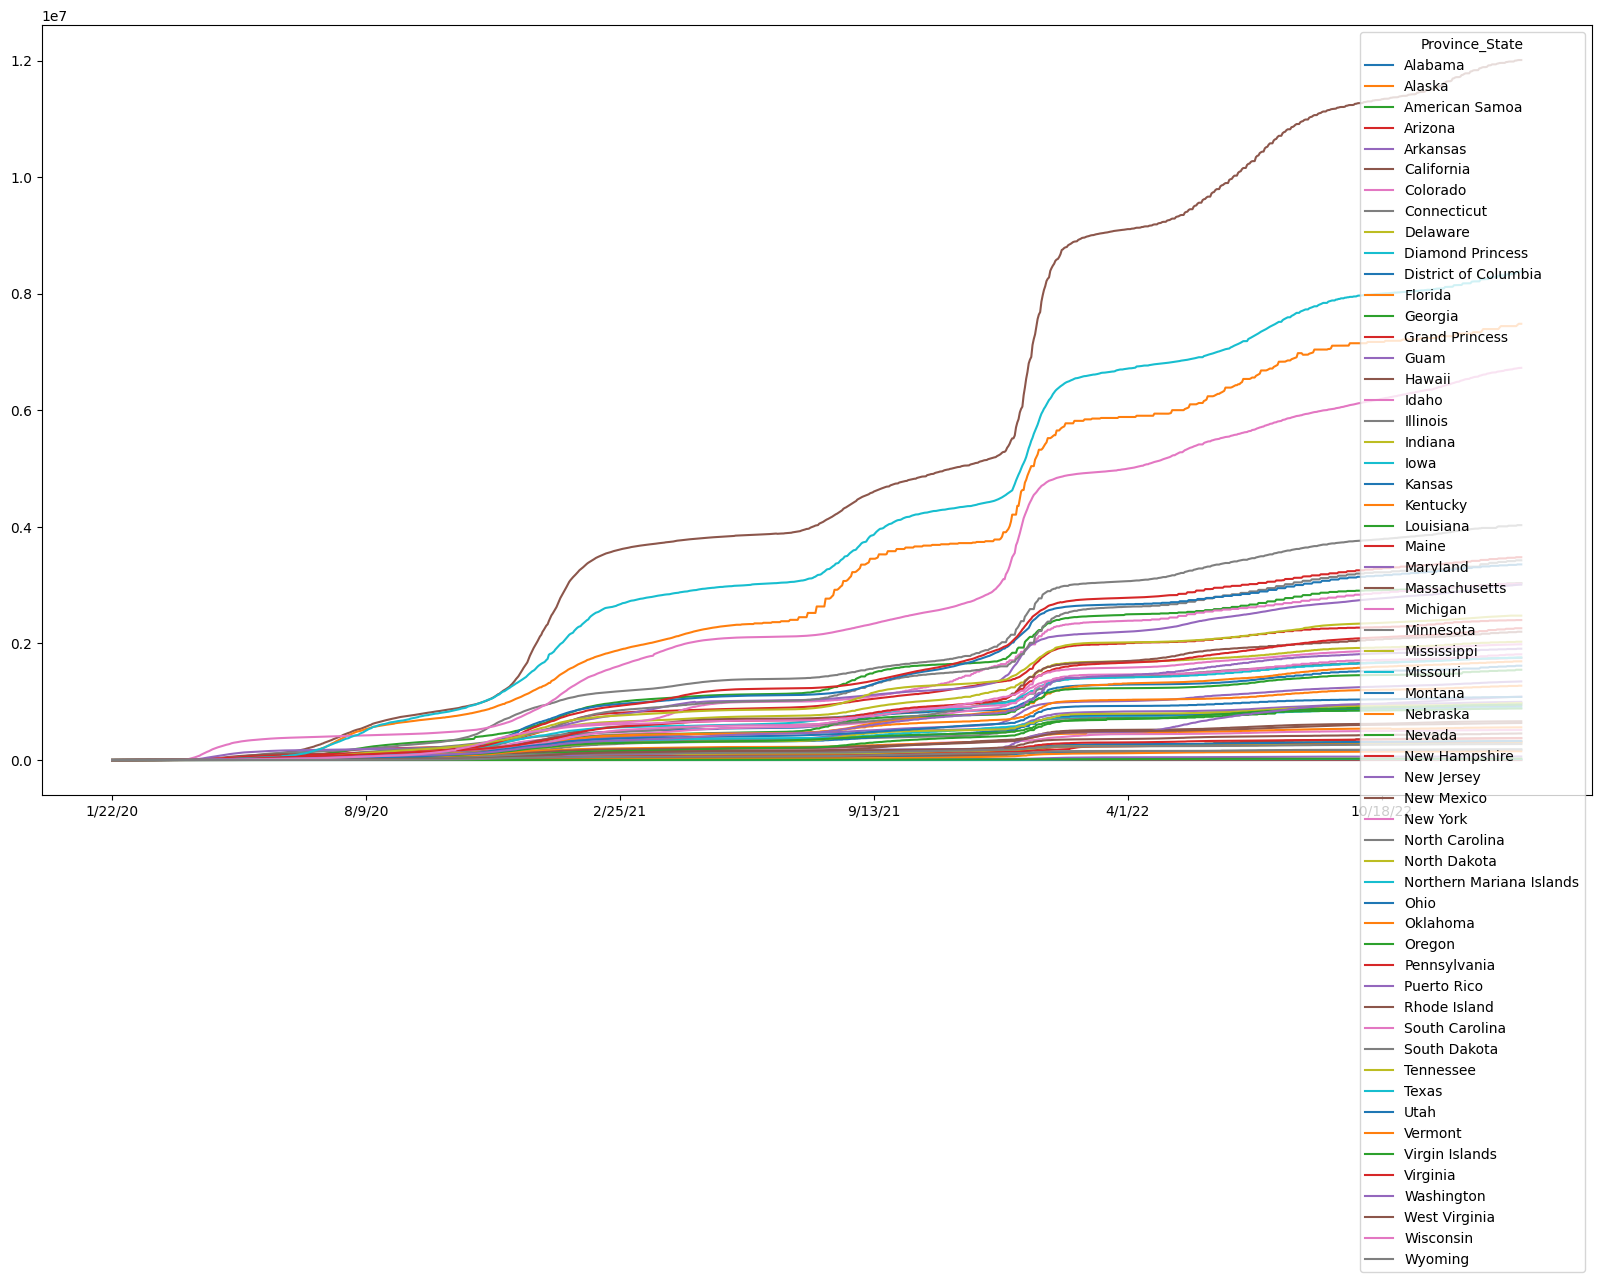

In [4]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
df = pd.read_csv(url)
df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1, inplace=True)
df.groupby('Province_State').sum().T.plot(figsize=(20,10))

In [5]:
## when province state is same for more than one row (i.e. Alaska), sum the values

df = df.groupby('Province_State').sum().reset_index()

In [6]:
df.shape

(58, 1112)

In [80]:
df.to_csv('covid19_confirmed_US.csv')

In [86]:
## creating a column in dataframe that averages up all the values in a row except the first column

df.shape[1]

df['Total'] = df.iloc[:, 1:].sum(axis=1)/df.shape[1]

In [93]:
## 10 states with the highest total number of cases

df.sort_values(by='Total', ascending=False).head(10)

,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/28/23,1/29/23,1/30/23,1/31/23,2/1/23,2/2/23,2/3/23,2/4/23,2/5/23,Total
5,California,0,0,0,0,2,2,2,2,2,...,11983053,11983053,11983053,11998032,11999615,12005616,12008942,12008942,12008942,5.197542e+06
49,Texas,0,0,0,0,0,0,0,0,0,...,8335417,8335417,8336211,8336979,8372997,8373501,8374364,8374364,8374364,3.864150e+06
11,Florida,0,0,0,0,0,0,0,0,0,...,7443954,7443954,7443954,7443954,7443954,7465016,7483857,7483857,7483857,3.361299e+06
36,New York,0,0,0,0,0,0,0,0,0,...,6701257,6702694,6711424,6713957,6716939,6721124,6725051,6726629,6727794,2.855640e+06
17,Illinois,0,0,1,1,1,1,1,1,1,...,4019768,4019768,4019768,4019768,4019768,4029905,4029905,4029905,4029905,1.791792e+06
43,Pennsylvania,0,0,0,0,0,0,0,0,0,...,3469076,3469076,3469902,3469902,3479345,3479345,3479345,3479345,3479345,1.550946e+06
40,Ohio,0,0,0,0,0,0,0,0,0,...,3347767,3347767,3347767,3347767,3347767,3356027,3356027,3356027,3356027,1.490520e+06
37,North Carolina,0,0,0,0,0,0,0,0,0,...,3412542,3412542,3412542,3412542,3425789,3425789,3425789,3425789,3425789,1.453606e+06
12,Georgia,0,0,0,0,0,0,0,0,0,...,3027856,3027856,3027856,3027856,3035874,3035874,3035874,3035874,3035874,1.439674e+06
26,Michigan,0,0,0,0,0,0,0,0,0,...,3024478,3024478,3024478,3030505,3030505,3030505,3030505,3030505,3030505,1.316141e+06


<AxesSubplot: title={'center': 'Top 10 States with Highest Average COVID-19 Cases'}>

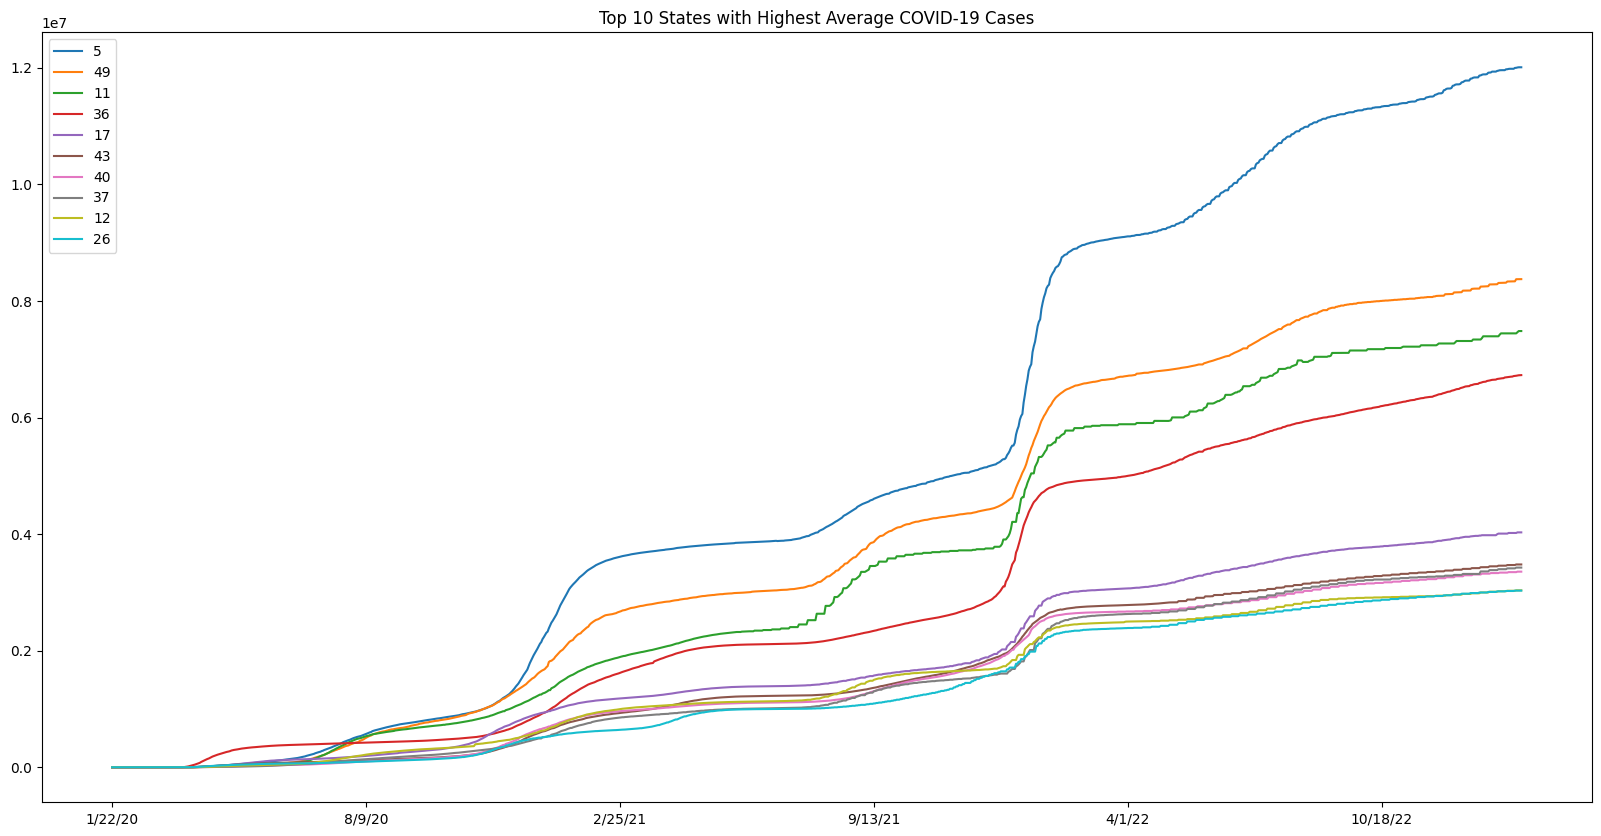

In [90]:
## for the top 10 highest average values plotting a date time plot which exclueds the first column and the last column and labeling them with their respective province state

df.sort_values(by='Total', ascending=False).head(10).iloc[:, 1:-1].T.plot(figsize=(20,10), title='Top 10 States with Highest Average COVID-19 Cases')